In [1]:
from process_data import readFile, getPacketInfo, createBins, getDataRate
import numpy as np
import matplotlib.pyplot as plt

# Measurement Data

Setup: 

In [2]:
data, packets_sent = readFile("output_small.txt")

packets = getPacketInfo(data)

seq = []
time = []
rtt = []

for x in packets:
    seq.append(int(x.seq))
    time.append(float(x.time))
    rtt.append(float(x.rtt))

data_big, packets_sent_big = readFile("output_big.txt")

packets_big = getPacketInfo(data_big)

seq_big = []
time_big = []
rtt_big = []

for x_big in packets_big:
    seq_big.append(int(x_big.seq))
    time_big.append(float(x_big.time))
    rtt_big.append(float(x_big.rtt))


RTT vs Time Bins:

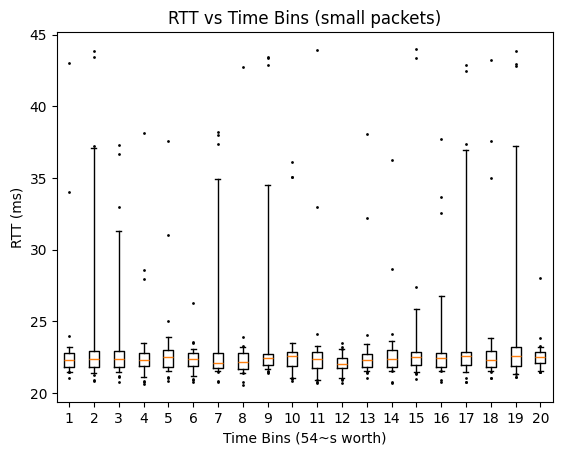

In [3]:

bins = createBins(rtt, seq, packets_sent, 60)

plt.boxplot(bins, widths=0.4, whis=[5,95],  flierprops={'markersize':1})
plt.xlabel("Time Bins (54~s worth)")
plt.ylabel("RTT (ms)")
plt.title("RTT vs Time Bins (small packets)")
plt.savefig("images/RTT_TimeBins_small.png")

Median RTT vs Time Bins:

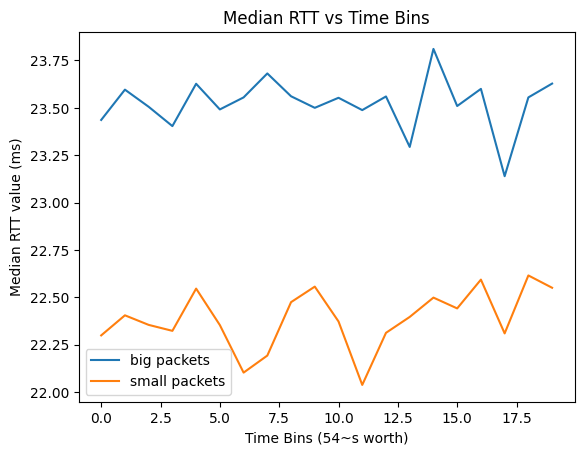

In [4]:
medians = []

for x in bins:
    medians.append(np.median(x))

medians_big = []

bins_big = createBins(rtt_big, seq_big, packets_sent_big, 60)

for x in bins_big:
    medians_big.append(np.median(x))


plt.xlabel("Time Bins (54~s worth)")
plt.ylabel("Median RTT value (ms)")
plt.title("Median RTT vs Time Bins")
plt.plot(medians_big, label="big packets")
plt.plot(medians, label="small packets")
plt.legend()
plt.savefig("images/MedianRTT_TimeBins.png")

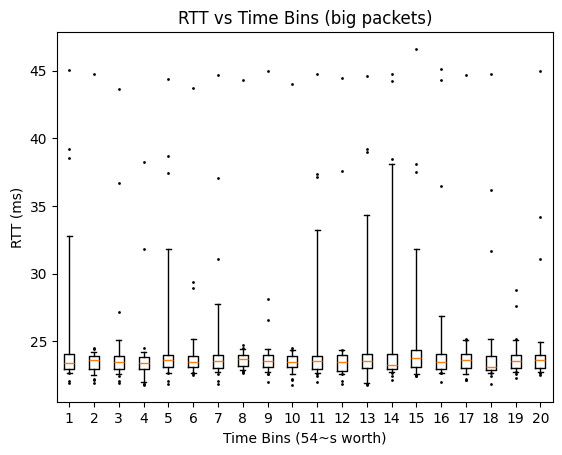

In [5]:
plt.boxplot(bins_big, widths=0.4, whis=[5,95], flierprops={'markersize':1})
plt.xlabel("Time Bins (54~s worth)")
plt.ylabel("RTT (ms)")
plt.title("RTT vs Time Bins (big packets)")
plt.savefig("images/RTT_TimeBins_big.png")

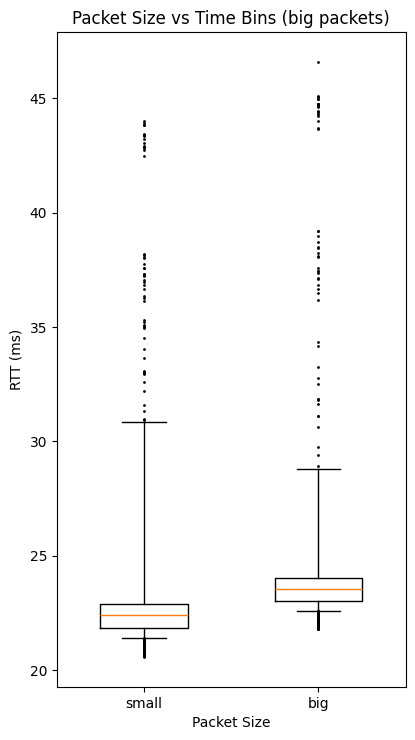

In [6]:
rtt_data = [rtt, rtt_big]
labels_rtt = ["small", "big"]
fig = plt
fig.rcParams['figure.figsize'] = [4.5, 8.5]
fig.boxplot(rtt_data, labels=labels_rtt, widths=0.5, whis=[5,95], flierprops={'markersize':1})
fig.xlabel("Packet Size")
fig.ylabel("RTT (ms)")
fig.title("Packet Size vs Time Bins (big packets)")
fig.savefig("images/RTT_PacketSize_spread.png")


Calculate the end-to-end data rate:

In [7]:
data_rate = getDataRate(packets, packets_big) 
print("Data Rate: " + str(data_rate) + " Mbps")

Data Rate: 20.38 Mbps


Calculate the loss:

In [8]:
loss = ((int(packets_sent) - len(packets)) / int(packets_sent)) * 100
print("Small loss: " + str(np.round(loss, decimals=2)) + "%")

loss_big = ((int(packets_sent_big) - len(packets_big)) / int(packets_sent_big)) * 100
print("Big loss: " + str(np.round(loss_big, decimals=2)) + "%")

Small loss: 11.5%
Big loss: 11.08%


Calculating delay:

In [9]:
delay_small = np.median(rtt) / 2
delay_big = np.median(rtt_big) / 2

print("Small delay: " + str(np.round(delay_small, decimals=2)))
print("Big delay: " + str(np.round(delay_big, decimals=2)))

Small delay: 11.21
Big delay: 11.76
